# Lecture 8: Finite Difference Derivative Approximations

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## 8a. Motivation

### 8a-i. Class Roadmap

During the first four class sessions (and tutorials and homework), we learned how to plan algorithms with pseudocode  to write Python code:
* 1 Getting Started in Python
* 2 Functions, Scoping, and Recursion
* 3 Numpy and Matplotlib
* 4 Dictionaries and Functions as Arguments

We then reviewed mathematical modeling of chemical engineering systems:
* 5 Mathematical Modeling: Linear and Algebriac Equations

And then we learned how to efficiently solve systems of linear equations numerically:
* 6 Gaussian Elimination
* 7 LU Factorization

In **this class**, we will learn how to numerically approximate derivatives:
* 8 Taylor Series and Finite Difference Approximations

In class sessions 9 - 12, we will see that algorithms to *solve nonlinear and integration problems* build on two core concepts:
* Numeric approximations of derivatives
* Solving a series of linear systems

We will also review Taylor series approximations in this lecture, which are used throughout the class.

### 8a-ii. Why numeric approximation?

You may recall that calculus usually deals with limits of some quantity that can be made arbitrarily small.  Nevertheless, when dealing with numerical methods we never actually have an infinitesimal value, rather we can only make quantities finitely small.  This introduces a **necessary approximation** whenever we do calculus on a computer. This contrasts to the direct solution of linear equations where we get the exact solution, up to computer round off.  In calculus we have additional errors as we will see in our first example of numerical calculus: the estimation of derivatives.

## 8b. Calculus Revisited: Derivates and Taylor Series

### 8b-i. The definition of a derivative

You may recall from Calculus I that a derivative is defined as the following limit

$$ f'(x) = \frac{df}{dx} = \lim_{h\rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$

On a computer we cannot evaluate the derivative using an infinitesimally small value for $h$.  The formulae that we derive will be called **finite difference derivatives** because $h$ will have a finite value rather than an infinitesimally small one. In one of our formulae we will approximate the derivative in the same manner as the above equation using
$$ f'(x) \approx \frac{f(x+h) - f(x)}{h}.$$ The error we incur in doing so will also be discussed.

### 8b-ii. Taylor Series and Big-O notation

For a function $f(x)$ we can approximate it near a point $x$ using the Taylor series

$$f(x + h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x) + \dots.$$

One way that this is commonly written is using a particular notation instead of the "$\dots$":

$$f(x + h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x) + O(h^4).$$

The $O(h^4)$ means that the rest of the terms will be proportional to $h^4$ as $h\rightarrow 0$.  We can see this through a simple example via Python.

### 8b-iii. Example: Approximating Cosine

Consider $f(x) = \cos(x)$.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Analytically compute the first three derivatives of $f(x)$. Hint: you may need to look up some basic differentiation rules. Then evaluate the derivates at $x=0$. Record your answer in the text/Markdown cell below.
</div>

**Home Activity Answers**

(keep in terms of $x$) $f'(x) = $

(substitute to remove $x$) $f'(0) = $

$f''(x) = $

$f''(0) = $

$f'''(x) = $

$f'''(0) = $

We will now construct a Taylor series appoximation to $f(x) = \cos(x)$ centered at the point $x=0$. We do this by substituting the values you calculated in the Home Activity into the general Taylor series formula:

$$f(x + h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x) + O(h^4)$$

To obtain:

$$\cos h \approx \cos 0 - h \sin 0 - \frac{h^2}{2} \cos 0 + \frac{h^3}{6} \sin 0 + O(h^4)$$

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Watch the first 6 minutes of <a href = "https://youtu.be/3d6DsjIBzJ4">this video</a> then answer the questions below. You many need to search YouTube for <i>3BLUE1BROWN SERIES, S2 E11, Taylor series</i> if the link has issues.
</div>

**Home Multiple Choice Questions**:

At $x = 0$ and $h = 0$, which derivates of our Taylor series and the true function f$(x)$ match exactly? Choose all that apply:
1. First derivatives match
2. Second derivates match
3. Third derivates match
4. Fourth derivates match
5. Fifth derivates match

Record your answer below in the Python list `my_answer`. Please use only integers (no decimals!).

In [1]:
### BEGIN SOLUTION
my_answer = [1, 2, 3]
### END SOLUTION

In [2]:
### BEGIN HIDDEN TESTS

assert 1 in my_answer, "Watch the video again. Pay attention between minutes 7 and 8."

assert 2 in my_answer, "Watch the video again. Pay attention between minutes 7 and 8."

assert 3 in my_answer, "Watch the video again. Pay attention between minutes 7 and 8."

assert 4 not in my_answer, "Watch the video again. Pay attention between minutes 7 and 8."

assert 5 not in my_answer, "Watch the video again. Pay attention between minutes 7 and 8."

### END HIDDEN TESTS

We will now plot the difference between $\cos h$ and the third-order Taylor series as a function of $h$ on a log-log scale. Please take a few minutes to study the code below. Carefully read the comments.

The Slope of the error on log-log scale is 3.9974955061239656


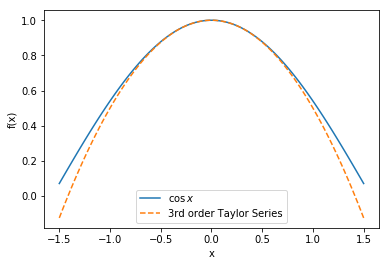

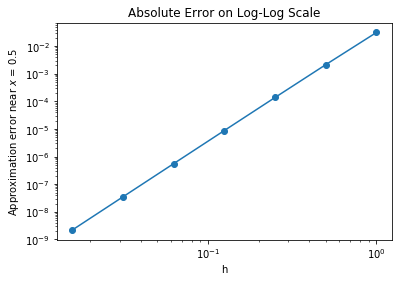

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
#this next line is only needed in iPython notebooks
%matplotlib inline 
import matplotlib
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick

def hide_spines(intx=False,inty=False):
    """Hides the top and rightmost axis splines from view for all active
    figures and their respective axes.
    
    You do not need to understand how this function works. For now, just think
    'this function helps format the plots'.
    """

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font, size=18) 
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
           # ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

# Define the function of interest and its derivates
f = lambda x: np.cos(x)
fprime =  lambda x: -np.sin(x)
fprime2 =  lambda x: -np.cos(x)
fprime3 =  lambda x: np.sin(x)

# Define the domain to investigate x
# Recall the syntax of linspace: start at -1.5 and end at 1.5 with 100 evenly spaced points
x = np.linspace(-1.5,1.5,100)

## Create first figure
plt.figure()

# Plot the true function
plt.plot(x,f(x),label="$\cos \,x$")

# Plot the Taylor series approximation
plt.plot(x,f(0) + x*fprime(0) + x**2/2*fprime2(0) + x**3/6*fprime3(0),
         "--",label="3rd order Taylor Series")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("f(x)")

## end first figure

## Second figure: approximation error versus perturbation size h

# Define the values of h to try. Recall '**' means 'raised to the power'
h = 2**np.array([0,-1.0,-2,-3,-4,-5,-6])

# Create two arrays of zeros to store the results
fapprox = 0*h
fexact = 0*h

# Set counter to zero
count = 0

# Specify value of x to compute approximation error
x = 0.5

# loop over values of h
for i in h:
    
    # calculate approximation for f(x + h)
    fapprox[count] = f(x) + i * fprime(x) + 0.5*i**2*fprime2(x) + 1.0/6.0*i**3*fprime3(x)
    
    # calculate true function value, i.e., f(x+h) 
    fexact[count] = f(x+i)
    
    # increase counter by 1
    count += 1
    
# calculate absolute value of error
errors = np.fabs(fapprox-fexact)

# Create second figure
plt.figure()
plt.loglog(h,errors,'o-')
plt.title("Absolute Error on Log-Log Scale")
plt.xlabel("h")
plt.ylabel("Approximation error near $x$ = " + str(x))
print("The Slope of the error on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))

## End second figure


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write at least one question you have about the code above.
</div>

**Home Activity Answer**:

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With your neighbor, walk through the code together. For the first five minutes, one person should explain the code to the other person. After 5 minutes, switch roles. As you go, discuss the questions you wrote down during the home activity. Make a list of questions to ask in class.
</div>

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Using the definition of a Taylor series, show why the slope in the above graph is very close to 4.
</div>

You might ask yourself, why is the slope 4?  Let's look at the equation for the error:
$$f(x+h) - \left(f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x)\right) = C h^4 + O(h^5),$$
in this equation we have used the fact that $O(h^4)$ means some constant, which here we call $C$, times $h^4$. The remaining terms we have written as $O(h^5)$.

When we take the absolute value and the logarithm of each side we get
$$\log_{10}\left|f(x+h) - \left(f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x)\right)\right| \approx \log_{10}|C| + 4 \log_{10}h,$$ which is a line with slope 4.  The constant tells us what level the curve starts out at when $h=1$. This formula is approximate because we have left out the $h^5$ and higher terms, which we assume to be small since $h$ is small in our demonstration above. 

## 8c. Our first finite difference formulae

### 8c-i. Forward Finite Difference

From the Taylor series at $x+h$,
$$f(x + h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x) + O(h^4),$$
we notice that there is an $f'(x)$ term in the equation.  If we "solve" for this derivative by subtracting $f(x)$ from both sides and then dividing by $h$ we get
$$\frac{f(x+h) - f(x)}{h} = f'(x) + \frac{h}{2} f''(x) + \frac{h^2}{6}f'''(x) + O(h^3),$$
or in shorter form
$$\frac{f(x+h) - f(x)}{h} = f'(x) + O(h).$$ Therefore the approximation
$$f'(x) \approx \frac{f(x+h) - f(x)}{h},$$ is an <b>order $h$</b> approximation because the error is proportional to $h$ as $h$ goes to 0. This is called a forward difference formula because the function is evaluated $h$ forward of $x$ to approximate the derivative.

### 8c-ii. Backward Finite Difference

We did this using $f(x+h)$ in our formula, but we could have also used $f(x-h)$ which has the Taylor series
$$f(x - h) = f(x) - h f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6}f'''(x) + O(h^4),$$
to get the formula
$$\frac{f(x) - f(x-h)}{h} = f'(x) + O(h).$$ Therefore the approximation
$$f'(x) \approx \frac{f(x) - f(x-h)}{h},$$ is also an <b>order $h$</b> approximation because the error is proportional to $h$ as $h$ goes to 0. This formula is a backward difference formula because the function is evaluated $h$ behind $x$.

### 8c-iii. Example to Compare the Approximations

Consider the function $$f(x) =  \arctan(x) \cosh(x),$$ which is plotted below.

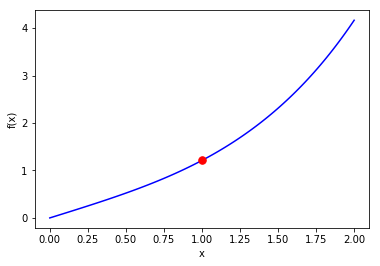

In [4]:
# define Python function
f = lambda x: np.cosh(x)*np.arctan(x)

# plot from 0 to 2 with 100 evenly spaced points
xplot = np.linspace(0,2,100)

# evaluate function at points xplot
fplot = f(xplot)

# create plot
plt.plot(xplot,fplot,'b-')
plt.plot(1.0, f(1.0),'r.',markersize=15)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

We want to numerically approximate $f'(x)$ at $x=1$ (red circle on the plot). The actual answer is $f'(1) = 1.694541176517952557683135$.

Below is Python code to compute a finite difference approximation at $x=1$ for different $h$ values. We then graphically study how the approximation error depends on $h$.

Forward Difference slope on log-log scale is 1.010405053694006


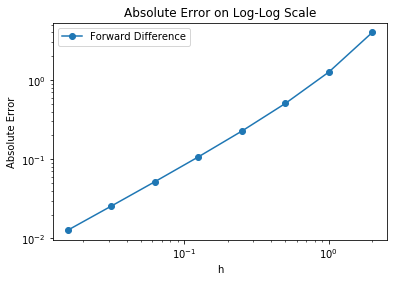

In [5]:
# define Python function (I did not need to do this because 'f' is defined in the previous cell)
f = lambda x: np.cosh(x)*np.arctan(x)

# specify values of h to study
h = 2**np.array([1,0,-1.0,-2,-3,-4,-5,-6])

# create vector of zeros to store results
forward = 0*h #variable to hold forward difference 

# activity: uncomment line below
# backward = 0*h #variable to hold backward difference 

# create counter
count = 0

# define exact solution
exact = 1.694541176517952557683135

# specify value of x to study
x = 1

# loop over all values for h
for i in h:
    
    # compute forward finite difference approximation
    forward[count] = (f(x+i) - f(x))/i
    
    # activity: uncomment and complete line below
    # backward[count] = # student fill in here
    count += 1
    
# plot absolute value of approximation error versus h on log-log plot
plt.loglog(h,np.fabs(forward-exact),'o-',label="Forward Difference")

# activity: copy the line above and modify to plot results with backwards difference formula 

plt.legend(loc="best")
plt.title("Absolute Error on Log-Log Scale")
plt.xlabel("h")
plt.ylabel("Absolute Error")

#print FD error slope
errors = np.fabs(forward-exact)
print("Forward Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))

# activity: copy the two lines above and modify for backward difference formula

Remember, the plot above uses a log-log scale. The linear trend with slope one means the absolute error grows $O(h^1)$. Notice that for $h$ values around 10$^0$ and higher, the slope increases.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Copy the above Python code to the cell below. Then adapt the code to also study the backward finite difference formula. Look for the comments that say "activity" for hints where to modify.
</div>

Forward Difference slope on log-log scale is 1.010405053694006
Backward Difference slope on log-log scale is 0.989507882880635


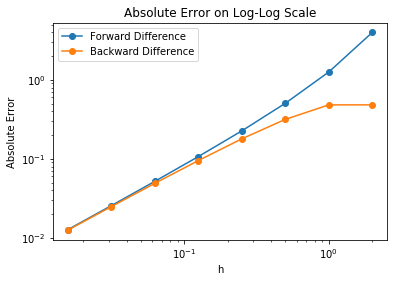

In [6]:
# define Python function (I did not need to do this because 'f' is defined in the previous cell)
f = lambda x: np.cosh(x)*np.arctan(x)

# specify values of h to study
h = 2**np.array([1,0,-1.0,-2,-3,-4,-5,-6])

# create vector of zeros to store results
forward = 0*h #variable to hold forward difference 

# activity: uncomment line below
backward = 0*h #variable to hold backward difference 

# create counter
count = 0

# define exact solution
exact = 1.694541176517952557683135

# specify value of x to study
x = 1

# loop over all values for h
for i in h:
    
    # compute forward finite difference approximation
    forward[count] = (f(x+i) - f(x))/i
    
    # activity: uncomment and complete line below
    backward[count] = (f(x)-f(x-i))/i
    count += 1
    
# plot absolute value of approximation error versus h on log-log plot
plt.loglog(h,np.fabs(forward-exact),'o-',label="Forward Difference")
plt.loglog(h,np.fabs(backward-exact),'o-',label="Backward Difference")
# activity: copy the line above and modify to plot results with backwards difference formula 

plt.legend(loc="best")
plt.title("Absolute Error on Log-Log Scale")
plt.xlabel("h")
plt.ylabel("Absolute Error")

#print FD error slope
errors = np.fabs(forward-exact)
print("Forward Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))

# activity: copy the two lines above and modify for backward difference formula
errors = np.fabs(backward-exact)
print("Backward Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))


## 8d. Higher-order Approximations

Both of the forward and backward formulas for the derivative are first-order in $h$.  These formulas are fine, but as we will see when we solve differential equations, first-order solutions typically have too much error for our purposes.  We desire a way of getting higher-order approximations to the derivative.

### 8d-i. Central Difference Formula

We will start with the **central difference formula**:

$$\frac{f(x+h) - f(x-h)}{2h} \approx f'(x)$$


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, determine the error order of the central difference formula. Use the following steps.
</div>

1. Copy the Taylor series approximations $f(x + h)$ and $f(x-h)$ on a new sheet of paper.
2. Subtract $f(x-h)$ from $f(x + h)$ to get $(f(x+h) - f(x-h))$
3. Cancel terms, divide by $2h$, and rearrange to obtain

$$\frac{f(x+h) - f(x-h)}{2h} = f'(x) ~+~ ...$$

4. Examine the ... part to determine the error order. How does is grow with $h$?

**Discussion for after class activity.**

The approximation
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h},$$

is an <b>order $h^2$</b> approximation because the error is proportional to $h^2$ as $h$ goes to 0.

This is called a central-difference formula because the function is evaluated around a center of $x$ a value of $h$ on either side. One thing to note is that the error terms in this approximation only have even powers of $h$ because of the way the odd powers cancel when combining the two.

With a second-order approximation, if I cut $h$ in half, the error goes down by a factor of 4, compared to a factor of 2 with a first-order method.

We could go through the process of obtaining even higher-order derivatives (third-order, fourth-order, etc), but in practice this is generally not useful because the formulas become cumbersome and there are typically better ways of accomplishing higher-order accuracy. We will see one of these ways shortly.

### 8d-ii. Comparison of the approximations

Let's revist the example $$f(x) =  \arctan(x) \cosh(x)$$ and look at approximations to $f'(x)$ at $x=1$. Recall, the actual answer is $f'(1) = 1.694541176517952557683135$.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, modify your code from 8c to also study the central difference approximation for this example. Make a plot that compares forward, backward and central different formulas.
</div>

Forward Difference slope on log-log scale is 1.010405053694006
Backward Difference slope on log-log scale is 0.989507882880635
Central Difference slope on log-log scale is 2.0000468073506825


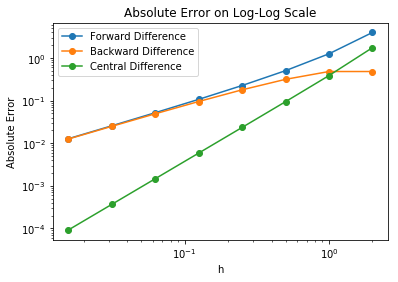

In [7]:
# define Python function (I did not need to do this because 'f' is defined in the previous cell)
f = lambda x: np.cosh(x)*np.arctan(x)

# specify values of h to study
h = 2**np.array([1,0,-1.0,-2,-3,-4,-5,-6])

# create vector of zeros to store results
forward = 0*h #variable to hold forward difference 

# activity: uncomment line below
backward = 0*h #variable to hold backward difference 

central = 0*h #variable to hold central differences

# create counter
count = 0

# define exact solution
exact = 1.694541176517952557683135

# specify value of x to study
x = 1

# loop over all values for h
for i in h:
    
    # compute forward finite difference approximation
    forward[count] = (f(x+i) - f(x))/i
    
    # activity: uncomment and complete line below
    backward[count] = (f(x)-f(x-i))/i
    
    central[count] = (f(x+i) - f(x-i))/2/i
    
    count += 1
    
# plot absolute value of approximation error versus h on log-log plot
plt.loglog(h,np.fabs(forward-exact),'o-',label="Forward Difference")
plt.loglog(h,np.fabs(backward-exact),'o-',label="Backward Difference")
plt.loglog(h,np.fabs(central-exact),'o-',label="Central Difference")
# activity: copy the line above and modify to plot results with backwards difference formula 

plt.legend(loc="best")
plt.title("Absolute Error on Log-Log Scale")
plt.xlabel("h")
plt.ylabel("Absolute Error")

#print FD error slope
errors = np.fabs(forward-exact)
print("Forward Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))

# activity: copy the two lines above and modify for backward difference formula
errors = np.fabs(backward-exact)
print("Backward Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))

errors = np.fabs(central-exact)
print("Central Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))


**Discussion after class activity**

In this example we see that the errors decay as expected for the two first-order methods and the one second-order method. As we expect, as $h$ gets smaller the second-order method wins out. Nevertheless, this does not mean that at a particular value of $h$ the second-order method will have smaller error.  The graph above shows that at $h=2$, the backward difference approximation has the smallest error. This is due to the fact that order of the formula just says how the error changes with $h$ and says nothing about the constant in front of the leading-order term.  Eventually, the second-order method will win, but we cannot say anything about a particular point.

## 8e. Truncation and Random Errors

*Note: During the next class, we will give a mini-lecture on how computers store floating point numbers and why this leads to inexact arithmetic.*


In class today, we learned about *truncation error*. We will now study *random errors*. We will see that our choice in $h$ for the approved finite different formulas requires balancing truncation versus random errors.

Consider the following test function:
$$ f(x) = e^{x} $$

with

$$f'(x) = e^{x}$$

Let's compare forward, backward, and central difference formulas for this function.

### 8e-i. Forward Difference

$$ f'_f(a) = \frac{f(a+\epsilon) - f(a)}{\epsilon} $$

You'll notice I switched to using $\epsilon$ instead of $h$. Textbooks are about evenly split on the notation. 

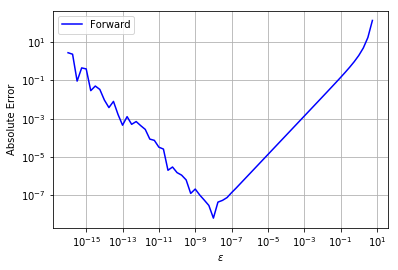

In [8]:
# Define the test function
def my_f(x):
    return np.exp(x)

# Specify point to examine
a = 1.0

# Calculate function value at x = a
fa = my_f(a)
# Calculate exact first derivative at x=1
df1 = my_f(a) # Need to replace if you consider a different test function!

# Generate values for epsilon
eps = np.power(10,np.arange(-16,1,0.25))
n = len(eps)

# Preallocate error array
error_forward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_forward = (my_f(a + eps[i]) - fa)/eps[i]
    error_forward[i] = abs(df1_forward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()

This plot succinctly shows the trade-offs between truncation and random errors that are ubiquitous across scientific computing. 
* On the **left**, we see a jagged line where absolute error increases with decreasing $\epsilon$. This is because of **random error**. The computer can only do arithmetic with finite percision. Recall the finite difference formulas require dividing by $\epsilon$, so as $\epsilon$ decreases the random error increases.
* On the **right**, we see a smooth line where absolute error increases with increasing $\epsilon$. This is because of **truncation error**. We learned earlier in this lecture how the Taylor series approximation gets worse with increasing $\epsilon$ (which is the same as $h$).

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write a sentence to describe what happens in the middle of the plot. Specifically discuss <i>random error</i> and <i>truncation error</i> in your sentence.
</div>

**Home Activity Answer**:

### 8e-ii. Backward Difference

Let's add backward difference to the same plot.

$$ f'_b(a) = \frac{f(a) - f(a - \epsilon)}{-\epsilon} $$

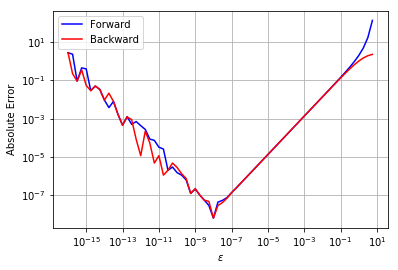

In [9]:
# Preallocate error array
error_backward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_backward = (fa - np.exp(a - eps[i]))/eps[i]
    error_backward[i] = abs(df1_backward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.legend()
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, speculate as to why the forward and backward difference curves are so similar. Why is the slope of the trends on the right the same? (Hint: look at the Taylor series analysis of these schemes early in the class notes.)
</div>

### 8e-iii. Central Difference

Finally, we will consider the central difference formula:

$$ f'_c(a) = \frac{f(a+\epsilon) - f(a - \epsilon)}{2 \epsilon} $$

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, add the cental difference formula to the plot. Hint: copy the backward difference code to below and modify. Then write three bullet points to discuss the plot.
</div>

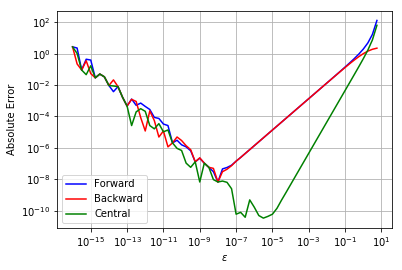

In [10]:
# Preallocate error array
error_central = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_central = (np.exp(a + eps[i]) - np.exp(a - eps[i]))/2/eps[i]
    error_central[i] = abs(df1_central - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.loglog(eps,error_central,label="Central",color="green")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.legend()
plt.show()

Write three bullet points to describe and discuss trends in the plot:
* 
* 
* 

### 8e-iv. Second (and Higher) Derivatives

We can also use the Taylor series to derive finite difference approximations for $f''(x)$:

$$\frac{f(x + h) -2 f(x) + f(x-h)}{h^2} = f''(x) + O(h^2)$$

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, derive the above approximation for f''(x). Use the following steps.
</div>

1. Write the Taylor series for f(x+h)
2. Write the Taylor series for f(x-h)
3. Add these two Taylor series together. Notice the $h$ and $h^3$ terms cancel.
4. Rearrange to isolate f''(x).

If we want high-order approximations to derivatives (or many other quantities) we can use Richardson extrapolation. This is an advanced topic we will not discuss further in this class. For those who are interested, I recommend reading the section 14.6 in *Computational Nuclear Engineering and Radiological Science Using Python*. 